# Abhinav Pratap Singh
## A2305219486

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
df= pd.read_csv('Mall.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='Annual Income (k$)'>

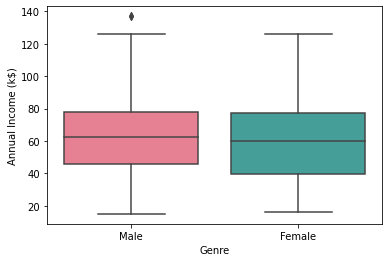

In [7]:
sns.boxplot(x="Genre", y="Annual Income (k$)", palette="husl", data=df)

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

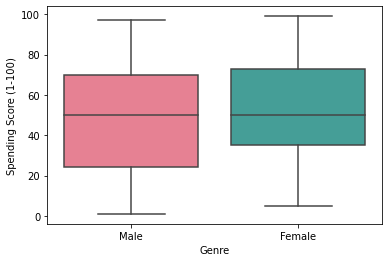

In [8]:
sns.boxplot(x="Genre", y="Spending Score (1-100)", palette="husl", data=df)

In [9]:
from scipy.stats import chi2

df_new =pd.DataFrame(df,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])

def mahalnobis(x=None, data=None, cov=None):
    a= x-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    b=np.linalg.inv(cov)
    left=np.dot(a,b)
    m=np.dot(left,a.T)
    return m.diagonal()

df_new['mahalnobis'] = mahalnobis(x=df_new,data=df_new[['Age','Annual Income (k$)','Spending Score (1-100)']])
print(df_new.head())

   Age  Annual Income (k$)  Spending Score (1-100)  mahalnobis
0   19                  15                      39    5.974200
1   21                  15                      81    5.387335
2   20                  16                       6    9.900938
3   23                  16                      77    4.726772
4   31                  17                      40    3.452776


In [10]:
from scipy.stats import chi2
df['p']=1- chi2.cdf(df_new['mahalnobis'],3)
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),p
0,1,Male,19,15,39,0.112872
1,2,Male,21,15,81,0.145535
2,3,Female,20,16,6,0.019427
3,4,Female,23,16,77,0.192933
4,5,Female,31,17,40,0.326939
5,6,Female,22,17,76,0.196924
6,7,Female,35,18,6,0.097423
7,8,Female,23,18,94,0.113888
8,9,Male,64,19,3,0.061031
9,10,Female,30,19,72,0.334213
